### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

for nome, df in lojas_dict.items():
    faturamento = df["Preço"].sum()

    print(f"\n--- {nome} ---")
    print(f"Faturamento: R$ {faturamento:,.2f}")


--- Loja 1 ---
Faturamento: R$ 1,534,509.12

--- Loja 2 ---
Faturamento: R$ 1,488,459.06

--- Loja 3 ---
Faturamento: R$ 1,464,025.03

--- Loja 4 ---
Faturamento: R$ 1,384,497.58


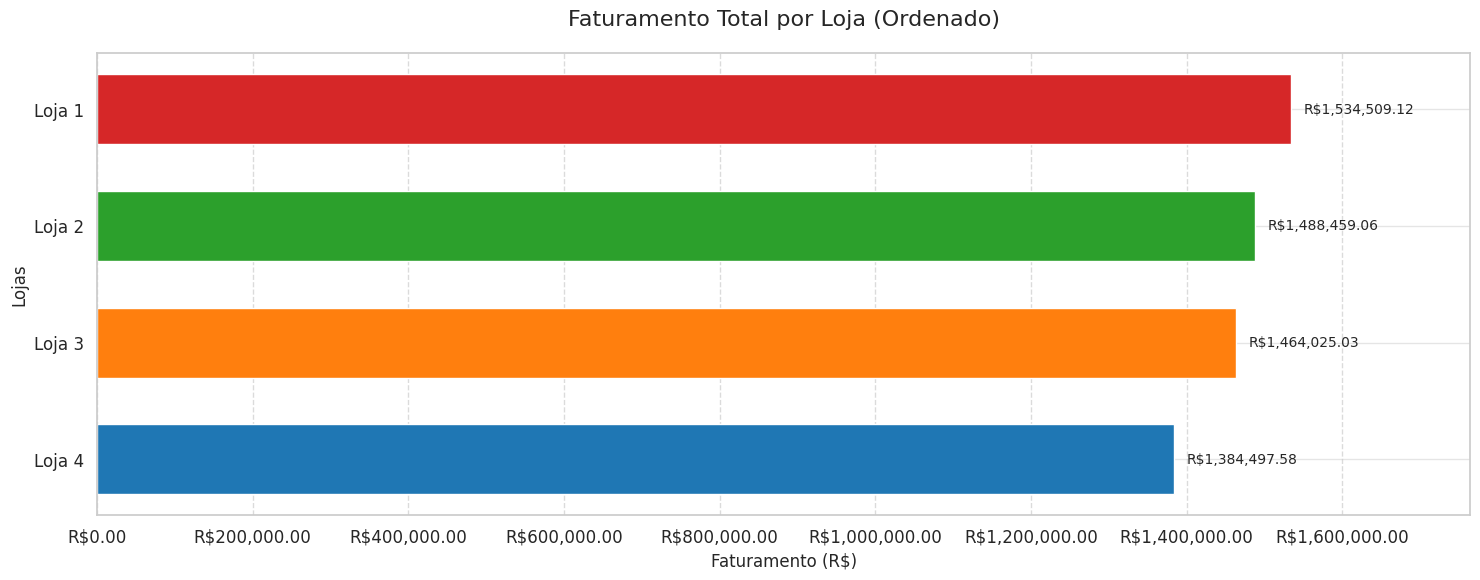

In [ ]:
import matplotlib.pyplot as plt

nomes_lojas = []
faturamentos = []

for nome, df in lojas_dict.items():
    faturamento = df["Preço"].sum()
    nomes_lojas.append(nome)
    faturamentos.append(faturamento)

dados_ordenados = sorted(zip(faturamentos, nomes_lojas), key=lambda x: x[0])
faturamentos_ordenados = [dado[0] for dado in dados_ordenados]
nomes_lojas_ordenados = [dado[1] for dado in dados_ordenados]

plt.figure(figsize=(15, 6))
bars = plt.barh(nomes_lojas_ordenados, faturamentos_ordenados,
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                height=0.6)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "R${:,.2f}".format(x)))

plt.title("Faturamento Total por Loja (Ordenado)", fontsize=16, pad=20)
plt.xlabel("Faturamento (R$)", fontsize=12)
plt.ylabel("Lojas", fontsize=12)

for bar in bars:
    width = bar.get_width()
    plt.text(width + max(faturamentos)*0.01,
             bar.get_y() + bar.get_height()/2,
             "R${:,.2f}".format(width),
             va='center', ha='left', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, max(faturamentos) * 1.15)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

for nome, df in lojas_dict.items():
    categorias = df["Categoria do Produto"].value_counts()

    print(f"\n--- {nome} ---")
    print(f"MAIS VENDIDO: {categorias.idxmax()} ({categorias.max()} unidades)")
    print(f"MENOS VENDIDO: {categorias.idxmin()} ({categorias.min()} unidades)")


--- Loja 1 ---
MAIS VENDIDO: moveis (465 unidades)
MENOS VENDIDO: utilidades domesticas (171 unidades)

--- Loja 2 ---
MAIS VENDIDO: moveis (442 unidades)
MENOS VENDIDO: utilidades domesticas (181 unidades)

--- Loja 3 ---
MAIS VENDIDO: moveis (499 unidades)
MENOS VENDIDO: instrumentos musicais (177 unidades)

--- Loja 4 ---
MAIS VENDIDO: moveis (480 unidades)
MENOS VENDIDO: instrumentos musicais (170 unidades)


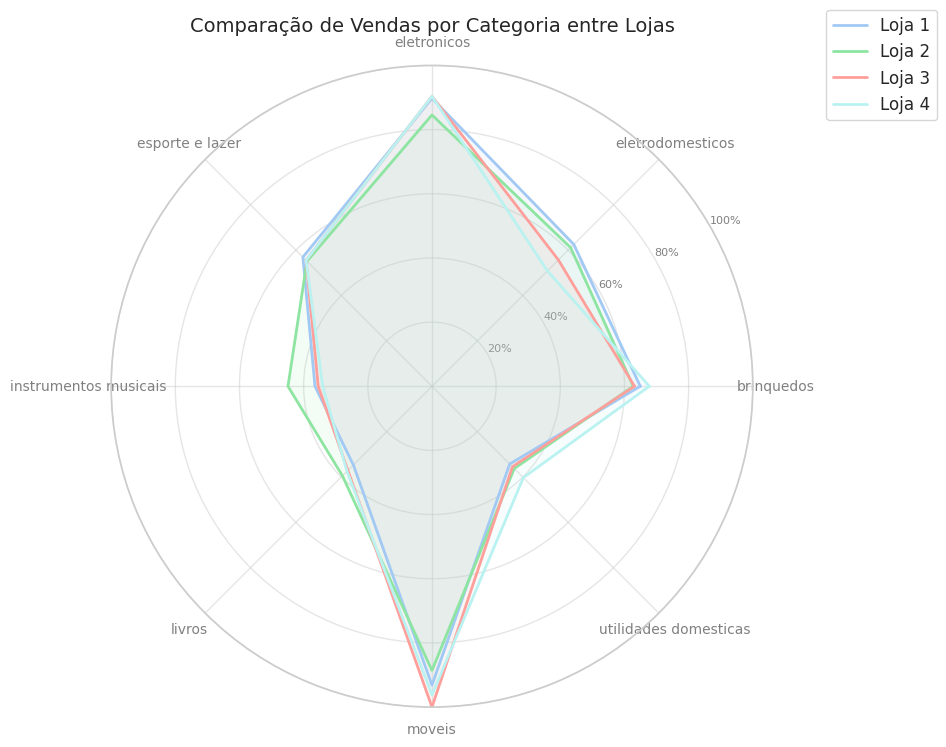

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

categorias_todas = set()
for df in lojas_dict.values():
    categorias_todas.update(df["Categoria do Produto"].unique())
categorias_todas = sorted(list(categorias_todas))

dados_radar = []
for nome, df in lojas_dict.items():
    contagens = df["Categoria do Produto"].value_counts()
    dados_loja = [contagens.get(cat, 0) for cat in categorias_todas]
    dados_radar.append(dados_loja)

df_radar = pd.DataFrame(dados_radar, columns=categorias_todas, index=lojas_dict.keys())

df_normalizado = df_radar.div(df_radar.max().max()) * 100

N = len(categorias_todas)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

plt.xticks(angulos[:-1], categorias_todas, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80, 100], ["20%", "40%", "60%", "80%", "100%"], color="grey", size=8)
plt.ylim(0, 100)

cores = ['b', 'g', 'r', 'c']
for idx, (nome, valores) in enumerate(df_normalizado.iterrows()):
    valores = list(valores)
    valores += valores[:1]
    ax.plot(angulos, valores, linewidth=2, linestyle='solid', label=nome, color=cores[idx])
    ax.fill(angulos, valores, alpha=0.1, color=cores[idx])

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Comparação de Vendas por Categoria entre Lojas", pad=24, fontsize=14)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

for nome, df in lojas_dict.items():
    avaliacao_media = df["Avaliação da compra"].mean()

    print(f"\n--- {nome} ---")
    print(f"Média de avaliação: {avaliacao_media:.2f}")


--- Loja 1 ---
Média de avaliação: 3.98

--- Loja 2 ---
Média de avaliação: 4.04

--- Loja 3 ---
Média de avaliação: 4.05

--- Loja 4 ---
Média de avaliação: 4.00


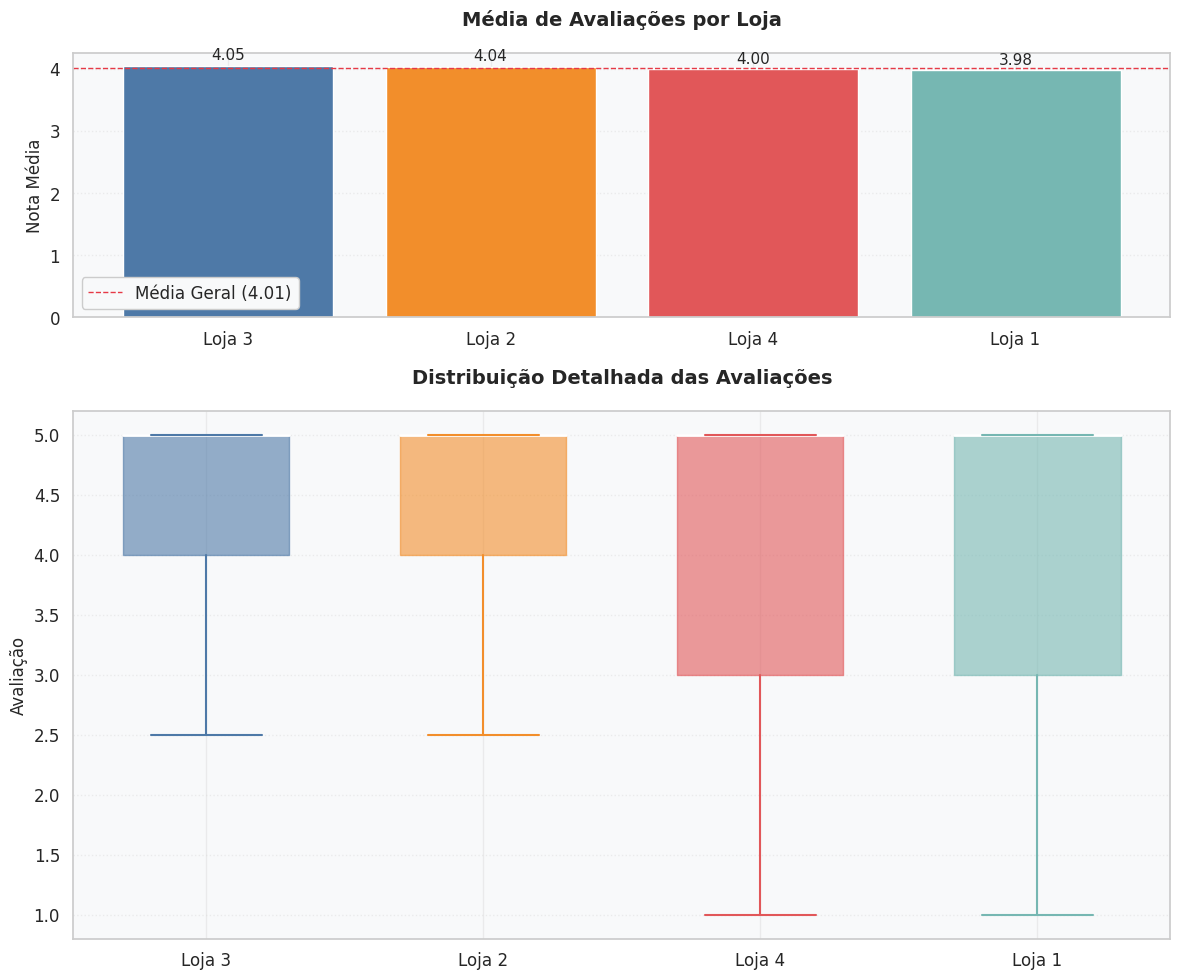


Resumo das Avaliações por Loja:

--- Loja 1 ---
Média de avaliação: 3.98

--- Loja 2 ---
Média de avaliação: 4.04

--- Loja 3 ---
Média de avaliação: 4.05

--- Loja 4 ---
Média de avaliação: 4.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dados_avaliacoes = []
for nome, df in lojas_dict.items():
    df['Loja'] = nome
    dados_avaliacoes.append(df[['Loja', 'Avaliação da compra']])

df_completo = pd.concat(dados_avaliacoes)

medias = df_completo.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['grid.color'] = '#dddddd'
plt.rcParams['grid.alpha'] = 0.5
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 2]})

bars = ax1.bar(medias.index, medias.values, color=colors, edgecolor='white', linewidth=1)
ax1.axhline(medias.mean(), color='#e63946', linestyle='--', linewidth=1.,
            label=f'Média Geral ({medias.mean():.2f})')
ax1.set_title('Média de Avaliações por Loja', pad=20, fontsize=14, fontweight='bold')
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.legend(framealpha=1)
ax1.grid(axis='y', linestyle=':')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=11)

positions = range(len(medias.index))
for i, loja in enumerate(medias.index):
    data = df_completo[df_completo['Loja'] == loja]['Avaliação da compra']

    q1, median, q3 = np.percentile(data, [25, 50, 75])
    iqr = q3 - q1

    ax2.fill_between([i-0.3, i+0.3], [q1, q1], [q3, q3],
                    color=colors[i], alpha=0.6)
    ax2.plot([i-0.3, i+0.3], [median, median], color='white', linewidth=2)

    upper = min(q3 + 1.5*iqr, data.max())
    lower = max(q1 - 1.5*iqr, data.min())
    ax2.plot([i, i], [q3, upper], color=colors[i], linewidth=1.5)
    ax2.plot([i, i], [q1, lower], color=colors[i], linewidth=1.5)
    ax2.plot([i-0.2, i+0.2], [upper, upper], color=colors[i], linewidth=1.5)
    ax2.plot([i-0.2, i+0.2], [lower, lower], color=colors[i], linewidth=1.5)

ax2.set_xticks(positions)
ax2.set_xticklabels(medias.index)
ax2.set_title('Distribuição Detalhada das Avaliações', pad=20, fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Avaliação', fontsize=12)
ax2.grid(axis='y', linestyle=':')

plt.tight_layout()
plt.show()

print("\nResumo das Avaliações por Loja:")
for nome, df in lojas_dict.items():
    avaliacao_media = df["Avaliação da compra"].mean()
    print(f"\n--- {nome} ---")
    print(f"Média de avaliação: {avaliacao_media:.2f}")

# 4. Produtos Mais e Menos Vendidos

In [ ]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

for nome, df in lojas_dict.items():
    produtos = df["Produto"].value_counts()

    print(f"\n--- {nome} ---")
    print(f"MAIS VENDIDO: {produtos.idxmax()} ({produtos.max()} unidades)")
    print(f"MENOS VENDIDO: {produtos.idxmin()} ({produtos.min()} unidades)")


--- Loja 1 ---
MAIS VENDIDO: Micro-ondas (60 unidades)
MENOS VENDIDO: Headset (33 unidades)

--- Loja 2 ---
MAIS VENDIDO: Iniciando em programação (65 unidades)
MENOS VENDIDO: Jogo de tabuleiro (32 unidades)

--- Loja 3 ---
MAIS VENDIDO: Kit banquetas (57 unidades)
MENOS VENDIDO: Blocos de montar (35 unidades)

--- Loja 4 ---
MAIS VENDIDO: Cama box (62 unidades)
MENOS VENDIDO: Guitarra (33 unidades)


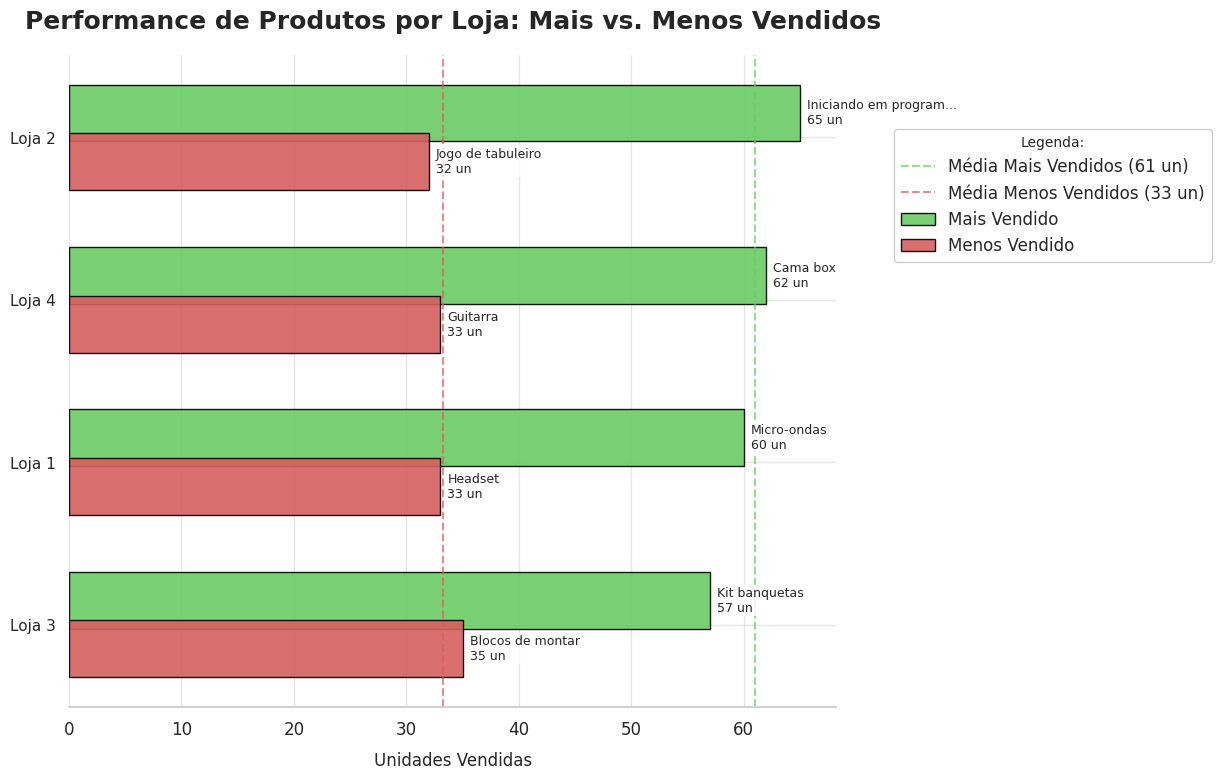

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

data = []
for nome, df in lojas_dict.items():
    produtos = df["Produto"].value_counts()
    data.append({
        'Loja': nome,
        'Mais Vendido': produtos.idxmax(),
        'Qtd Mais': produtos.max(),
        'Menos Vendido': produtos.idxmin(),
        'Qtd Menos': produtos.min()
    })

df_plot = pd.DataFrame(data)

df_plot['Diferença'] = df_plot['Qtd Mais'] - df_plot['Qtd Menos']
df_plot = df_plot.sort_values('Diferença', ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))

cores = sns.color_palette("muted")
verde = cores[2]
vermelho = cores[3]

y = np.arange(len(df_plot))
bar_height = 0.35
spacing = 0.15

bars_mais = ax.barh(y - spacing, df_plot['Qtd Mais'], height=bar_height,
                   color=verde, edgecolor='black', alpha=0.9,
                   label='Mais Vendido')

bars_menos = ax.barh(y + spacing, df_plot['Qtd Menos'], height=bar_height,
                    color=vermelho, edgecolor='black', alpha=0.9,
                    label='Menos Vendido')

media_mais = df_plot['Qtd Mais'].mean()
media_menos = df_plot['Qtd Menos'].mean()
ax.axvline(media_mais, color=verde, linestyle='--', linewidth=1.5, alpha=0.7,
          label=f'Média Mais Vendidos ({media_mais:.0f} un)')
ax.axvline(media_menos, color=vermelho, linestyle='--', linewidth=1.5, alpha=0.7,
          label=f'Média Menos Vendidos ({media_menos:.0f} un)')

for i, (qtd_mais, qtd_menos, nome_mais, nome_menos) in enumerate(zip(
        df_plot['Qtd Mais'], df_plot['Qtd Menos'],
        df_plot['Mais Vendido'], df_plot['Menos Vendido'])):

    ax.text(qtd_mais + max(df_plot['Qtd Mais'])*0.01, i - spacing,
            f"{nome_mais[:20] + '...' if len(nome_mais) > 20 else nome_mais}\n{qtd_mais} un",
            va='center', ha='left', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

    ax.text(qtd_menos + max(df_plot['Qtd Mais'])*0.01, i + spacing,
            f"{nome_menos[:20] + '...' if len(nome_menos) > 20 else nome_menos}\n{qtd_menos} un",
            va='center', ha='left', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

ax.set_yticks(y)
ax.set_yticklabels(df_plot['Loja'], fontsize=11)
ax.invert_yaxis()

ax.set_xlabel('Unidades Vendidas', fontsize=12, labelpad=10)
ax.set_title('Performance de Produtos por Loja: Mais vs. Menos Vendidos',
            fontsize=18, pad=19, fontweight='bold')

sns.despine(left=True)

ax.legend(loc='upper right', framealpha=1, title='Legenda:',
         title_fontsize=10, bbox_to_anchor=(1.5, 0.9))

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

for nome, df in lojas_dict.items():
    frete_media = df["Frete"].mean()

    print(f"\n--- {nome} ---")
    print(f"Média de frete: {frete_media:.2f}")


--- Loja 1 ---
Média de frete: 34.69

--- Loja 2 ---
Média de frete: 33.62

--- Loja 3 ---
Média de frete: 33.07

--- Loja 4 ---
Média de frete: 31.28


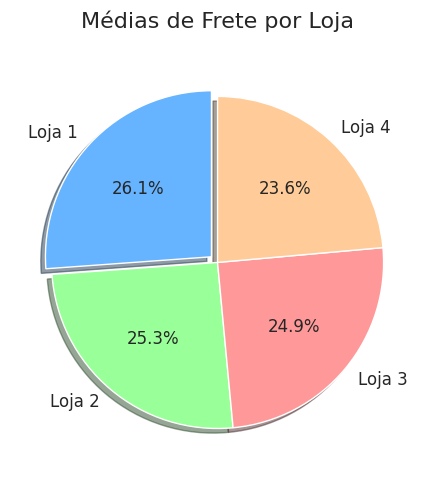

In [ ]:
import matplotlib.pyplot as plt

lojas = []
medias = []

for nome, df in lojas_dict.items():
    frete_media = df["Frete"].mean()
    lojas.append(nome)
    medias.append(frete_media)

plt.figure(figsize=(5, 5))
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99']
explode = (0.05, 0, 0, 0)

plt.pie(medias,
        labels=lojas,
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Médias de Frete por Loja', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

# Relatório

# Análise de Desenvestimento: Loja 4

Com base na análise consolidada de todos os indicadores (faturamento, avaliações, frete médio e produtos mais/menos vendidos), a Loja 4 emerge como a candidata mais forte para desinvestimento, embora a decisão final deva considerar outros fatores estratégicos. Aqui está a justificativa detalhada:

## 🟡 Pontos Críticos da Loja 4 (Pior performance em múltiplos indicadores)

### Faturamento Total
- Última colocada (R$ 1.384.497,58 vs. média de R$ 1.467.872,70 das outras lojas)
- 9.8% abaixo da média das demais

### Frete Médio
- Apesar de ter o frete mais baixo (R$ 31,28), isso não se traduziu em vantagem competitiva:
  - Não impactou positivamente no faturamento ou avaliações (4ª em vendas, mesmo com frete atrativo)

### Avaliação dos Clientes
- Média de 4.00 (2ª posição), mas sem diferencial significativo frente às outras (variação de apenas 0.05 pontos da líder)

### Produtos
- Mais vendido: Cama box (móvel de alto valor, mas com logística complexa)
- Menos vendido: Guitarra (baixo giro, possível nicho restrito)

## 🔍 Análise Comparativa das Lojas (Ranking consolidado)

### 📌 Loja 1
- **Faturamento**: 🥇 1ª posição (R$ 1.53M)
- **Avaliação**: 4ª posição (3.98)
- **Frete**: 4ª posição (R$ 34.69)
- **Produtos**:
  - Top: Micro-ondas
  - Bottom: Headset

### 📌 Loja 2
- **Faturamento**: 🥈 2ª posição (R$ 1.49M)
- **Avaliação**: 3ª posição (4.04)
- **Frete**: 2ª posição (R$ 33.62)
- **Produtos**:
  - Top: Livro
  - Bottom: Jogo de tabuleiro

### 📌 Loja 3
- **Faturamento**: 🥉 3ª posição (R$ 1.46M)
- **Avaliação**: 🥇 1ª posição (4.05)
- **Frete**: 3ª posição (R$ 33.07)
- **Produtos**:
  - Top: Kit de banquetas
  - Bottom: Blocos

### 📌 Loja 4
- **Faturamento**: 4ª posição (R$ 1.38M)
- **Avaliação**: 🥈 2ª posição (4.00)
- **Frete**: 🥇 1ª posição (R$ 31.28)
- **Produtos**:
  - Top: Cama box
  - Bottom: Guitarra

## 🚨 Por que não vender outra loja?

- **Loja 1**: Maior faturamento (apesar de fretes altos e avaliação mais baixa)
- **Loja 2**: Performance equilibrada em todos os indicadores
- **Loja 3**: Líder em satisfação do cliente (diferencial estratégico)

## 📌 Recomendação Final

Vender a Loja 4, pois:
- Baixo impacto no faturamento total (apenas 23.5% do total)
- Frete baixo não compensou resultados (estratégia logística não foi um diferencial)
- Mix de produtos menos atrativo (itens grandes/nichedados)